# Laboratorium 1


### Konfiguracja

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
import random

### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [149]:
class PointsCollection:
    def __init__(self, points = [], color = None, marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = None):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Przykład użycia

<IPython.core.display.Javascript object>


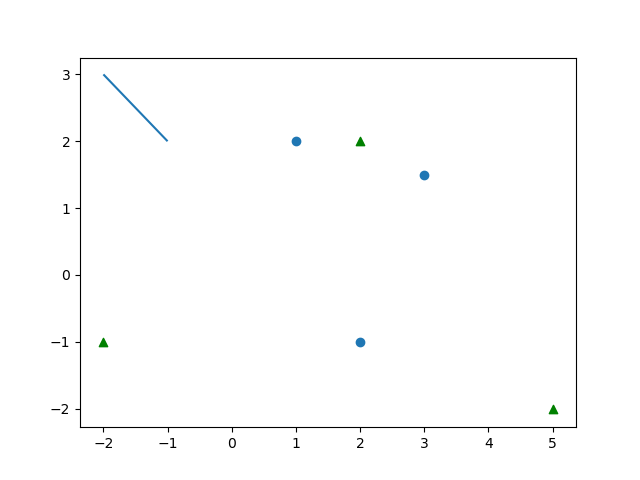

In [150]:
%matplotlib notebook

plot = Plot([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
             PointsCollection([(5, -2), (2, 2), (-2, -1)], color = 'green', marker = "^")], 
            [LinesCollection([[(-1,2),(-2,3)]])])
plot.draw()

### Rozwiązanie

#### Generowanie zbiorów punktów

In [151]:
%matplotlib notebook

A = [(random.uniform(-1000, 1000), random.uniform(-1000, 1000)) for i in range(10**5)]
plotA = Plot([PointsCollection(A[:100000], marker="_")])
#plotA.draw()

B = [(random.uniform(-1 * (10**14), 10**14), random.uniform(-1 * (10**14), 10**14)) for i in range(10**5)]
plotB = Plot([PointsCollection(B, marker="_")])
#plotB.draw()

rand = 4*np.random.random(1000)
C = [(100*np.cos((np.pi/2)*i), 100*np.sin((np.pi/2)*i)) for i in rand]
plotC = Plot([PointsCollection(C, marker=".")])
#plotC.draw()

a = (-1.0, 0.0)
b = (1.0, 0.1)
v = (b[0]-a[0], b[1]-a[1])
rand2 = 1/v[0]*(2000*np.random.random(1000)-1000-a[0])
D = [(a[0]+t*v[0], a[1]+t*v[1]) for t in rand2]
plotD = Plot([PointsCollection(D, marker=".")])
#plotD.draw()


<IPython.core.display.Javascript object>


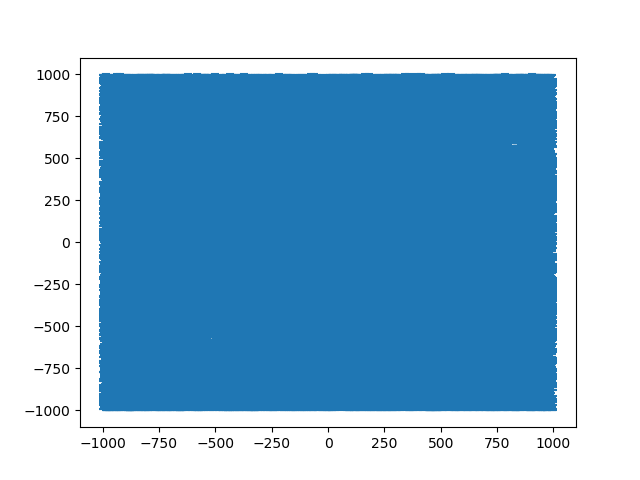

In [155]:
%matplotlib notebook
plotA.draw()

<IPython.core.display.Javascript object>


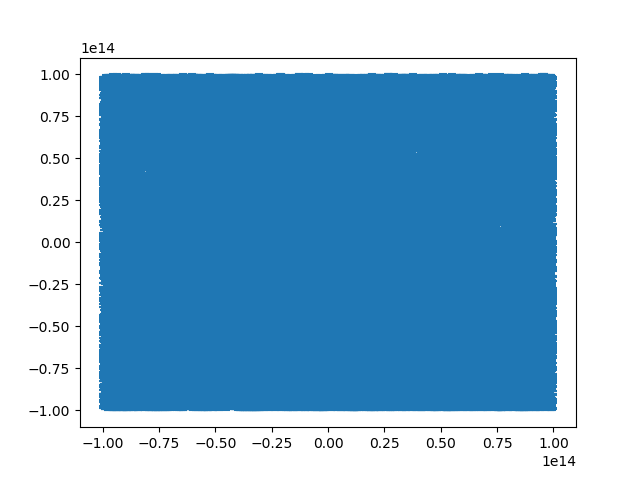

In [156]:
%matplotlib notebook
plotB.draw()

<IPython.core.display.Javascript object>


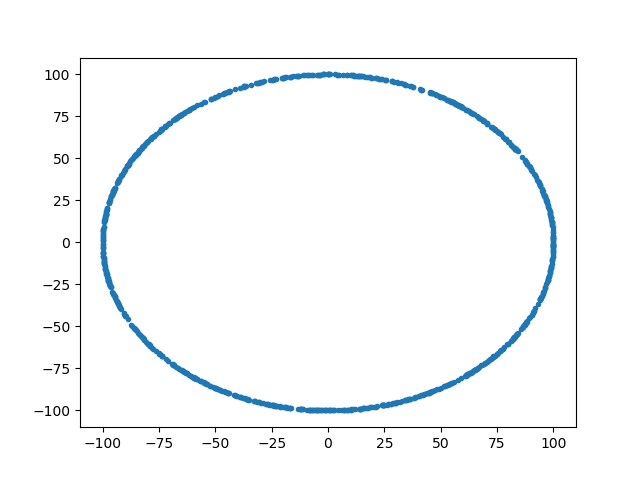

In [157]:
%matplotlib notebook
plotC.draw()

<IPython.core.display.Javascript object>


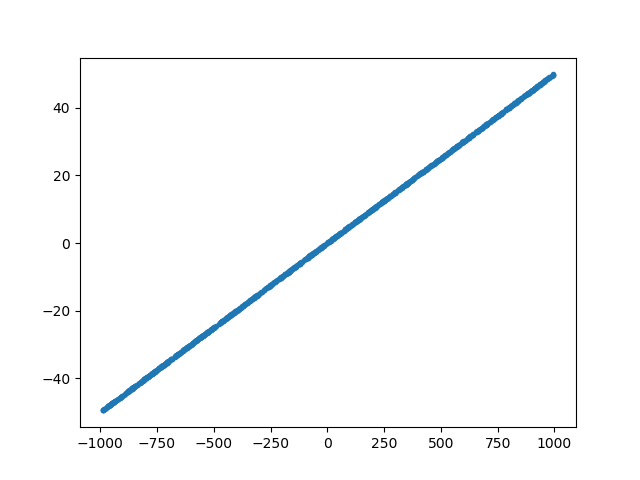

In [158]:
%matplotlib notebook
plotD.draw()

#### Definicja wyznaczników

In [159]:
def det_1(a, b, c):
    return a[0]*b[1]+a[1]*c[0]+b[0]*c[1]-c[0]*b[1]-a[0]*c[1]-a[1]*b[0]

In [160]:
def det_2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1])-(b[0]-c[0])*(a[1]-c[1])

In [161]:
def det_1_np(a, b, c):
    m = np.array([[a[0], a[1], 1], [b[0], b[1], 1], [c[0], c[1], 1]])
    return np.linalg.det(m)

In [162]:
def det_2_np(a, b, c):
    m = np.array([[a[0]-c[0], a[1]-c[1]], [b[0]-c[0], b[1]-c[1]]])
    return np.linalg.det(m)

#### Podział punktów $eps = 0$

In [163]:
def divide(Z, a, b, det, eps):
    help = []
    divided = [[], [], []]
    for i in Z:
        w = det(a, b, i)
        help.append(w)
        if w>eps:
            divided[0].append(i)
        elif w<-eps:
            divided[2].append(i)
        else:
            divided[1].append(i)
            
    return divided

In [164]:
def createDivision(Z, a, b, eps):
    return (divide(Z, a, b, det_1, eps), divide(Z, a, b, det_2, eps), divide(Z, a, b, det_1_np, eps), divide(Z, a, b, det_2_np, eps))
    

In [165]:
eps = np.float64(0.0)

In [166]:
A_divided_1, A_divided_2, A_divided_1_np, A_divided_2_np = createDivision(A, a, b, eps)

In [167]:
B_divided_1, B_divided_2, B_divided_1_np, B_divided_2_np = createDivision(B, a, b, eps)

In [168]:
C_divided_1, C_divided_2, C_divided_1_np, C_divided_2_np = createDivision(C, a, b, eps)

In [169]:
D_divided_1, D_divided_2, D_divided_1_np, D_divided_2_np = createDivision(D, a, b, eps)

In [170]:
def plotDivision(div, n, s):
    %matplotlib notebook
    line = [(-s, 0.05*(-s)+0.05), (s, 0.05*s+0.05)]
    plot = Plot(points=[PointsCollection(div[0][:n], color="green"), PointsCollection(div[1][:n], color="red"), PointsCollection(div[2][:n], color="yellow")],lines=[LinesCollection(lines=[line])])
    plot.draw()
    print("Above line: {}".format(len(div[0])))
    print("At line: {}".format(len(div[1])))
    print("Under line: {}".format(len(div[2])))

<IPython.core.display.Javascript object>


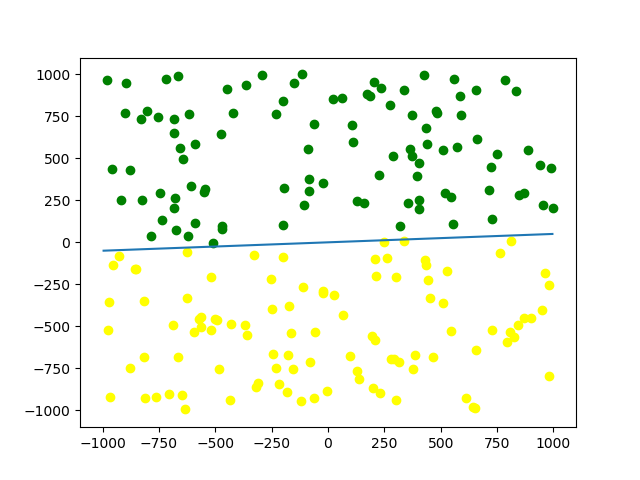

Above line: 49981
At line: 0
Under line: 50019


In [171]:
plotDivision(A_divided_1, 100, 1000)

<IPython.core.display.Javascript object>


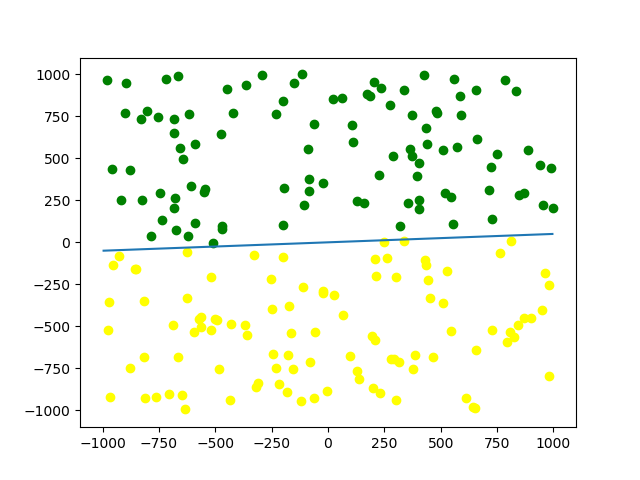

Above line: 49981
At line: 0
Under line: 50019


In [172]:
plotDivision(A_divided_2, 100, 1000)

<IPython.core.display.Javascript object>


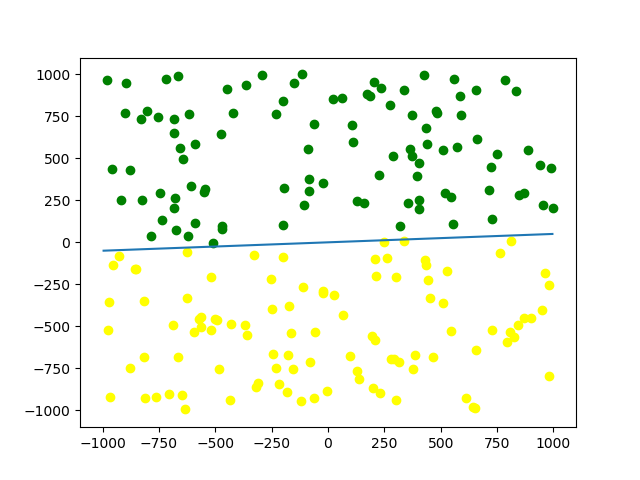

Above line: 49981
At line: 0
Under line: 50019


In [173]:
plotDivision(A_divided_1_np, 100, 1000)

<IPython.core.display.Javascript object>


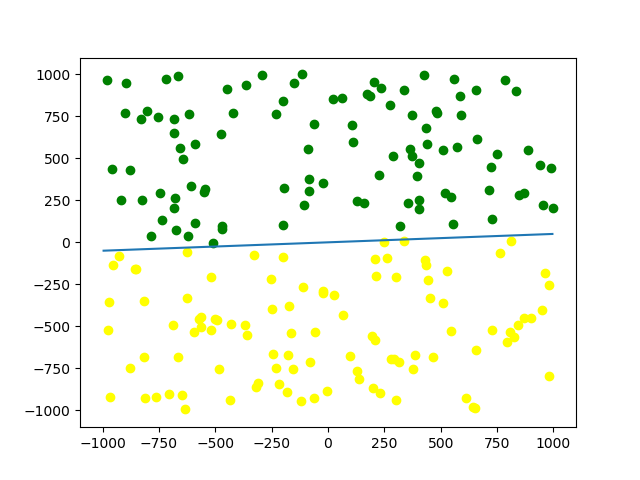

Above line: 49981
At line: 0
Under line: 50019


In [174]:
plotDivision(A_divided_2_np, 100, 1000)

<IPython.core.display.Javascript object>


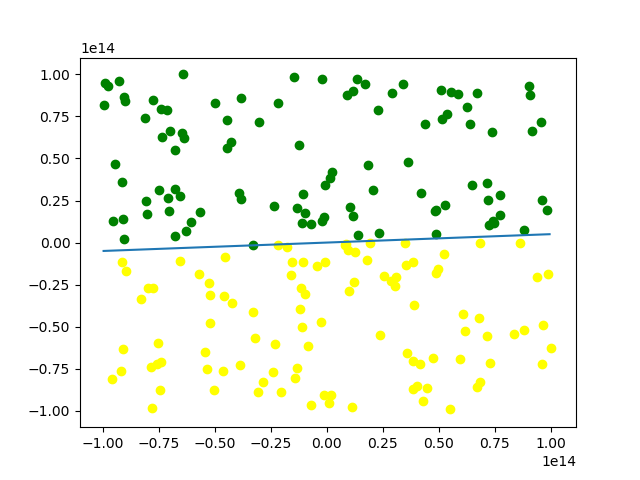

Above line: 49787
At line: 0
Under line: 50213


In [175]:
plotDivision(B_divided_1, 100, 10**14)

<IPython.core.display.Javascript object>


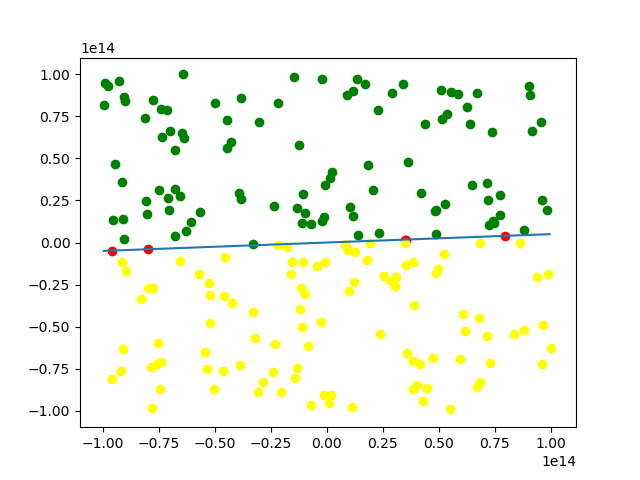

Above line: 49783
At line: 5
Under line: 50212


In [176]:
plotDivision(B_divided_2, 100, 10**14)

<IPython.core.display.Javascript object>


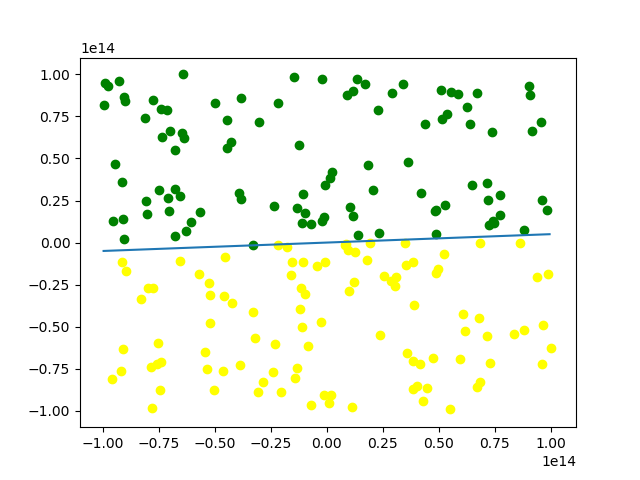

Above line: 49787
At line: 0
Under line: 50213


In [177]:
plotDivision(B_divided_1_np, 100, 10**(14))

<IPython.core.display.Javascript object>


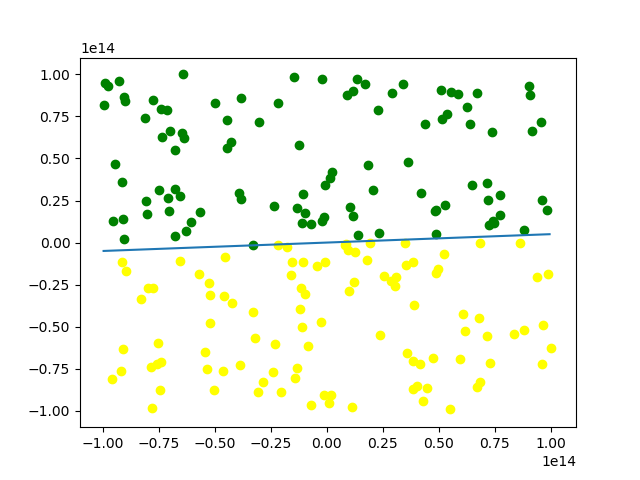

Above line: 49787
At line: 0
Under line: 50213


In [178]:
plotDivision(B_divided_2_np, 100, 10**(14))

<IPython.core.display.Javascript object>


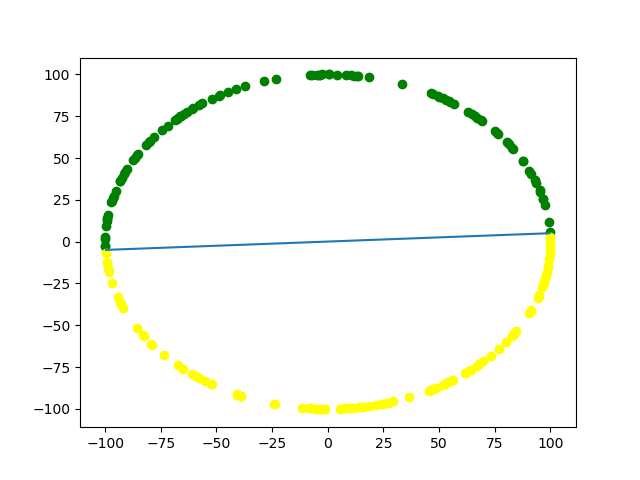

Above line: 483
At line: 0
Under line: 517


In [179]:
plotDivision(C_divided_1, 100, 100)

<IPython.core.display.Javascript object>


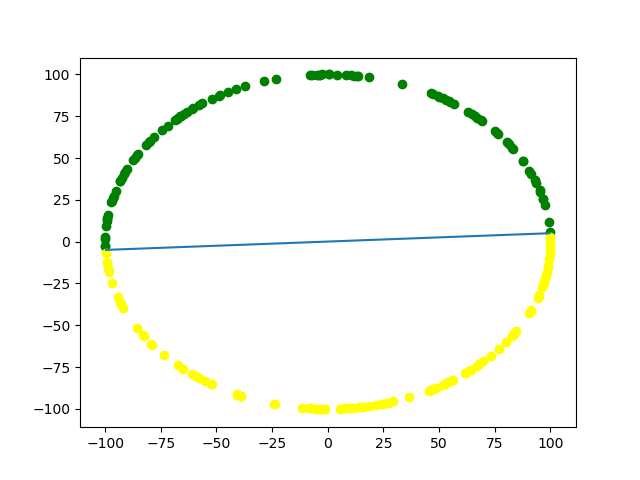

Above line: 483
At line: 0
Under line: 517


In [180]:
plotDivision(C_divided_2, 100, 100)

<IPython.core.display.Javascript object>


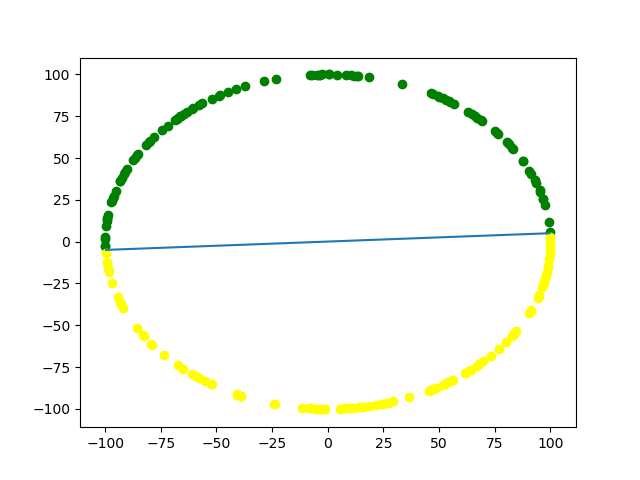

Above line: 483
At line: 0
Under line: 517


In [181]:
plotDivision(C_divided_1_np, 100, 100)

<IPython.core.display.Javascript object>


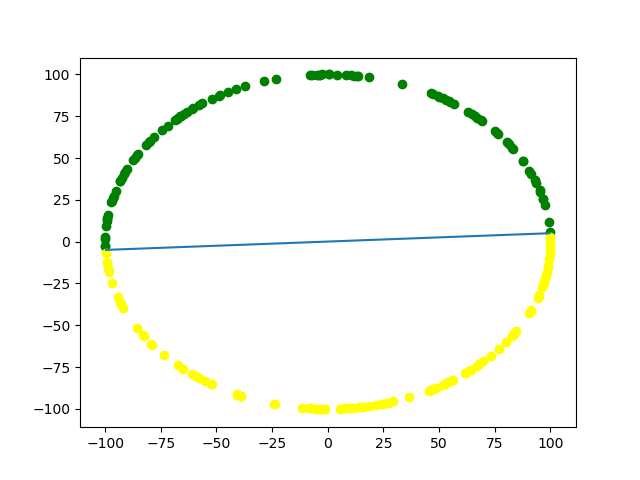

Above line: 483
At line: 0
Under line: 517


In [182]:
plotDivision(C_divided_2_np, 100, 100)

<IPython.core.display.Javascript object>


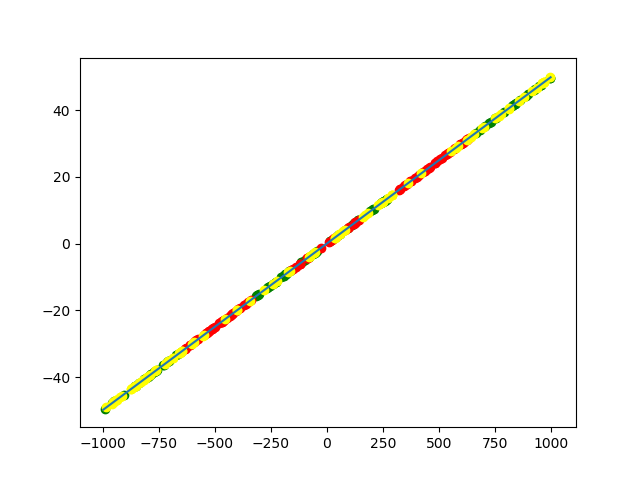

Above line: 279
At line: 328
Under line: 393


In [183]:
plotDivision(D_divided_1, 100, 1000)

<IPython.core.display.Javascript object>


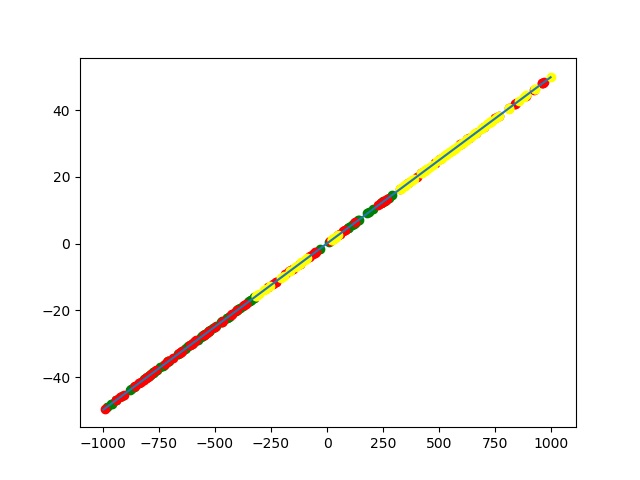

Above line: 162
At line: 706
Under line: 132


In [184]:
plotDivision(D_divided_2, 100, 1000)

<IPython.core.display.Javascript object>


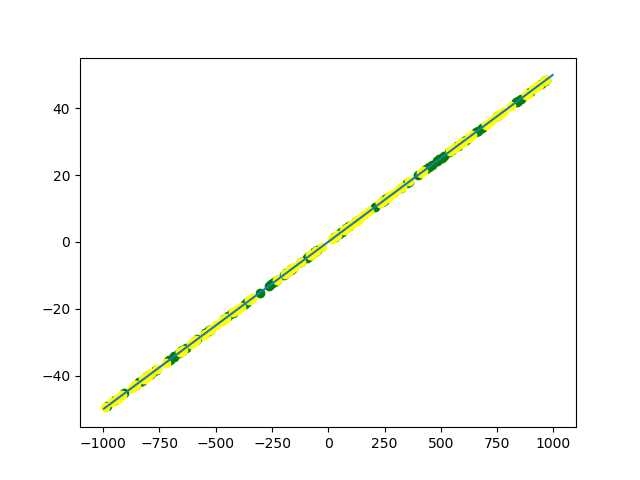

Above line: 506
At line: 0
Under line: 494


In [185]:
plotDivision(D_divided_1_np, 100, 1000)

<IPython.core.display.Javascript object>


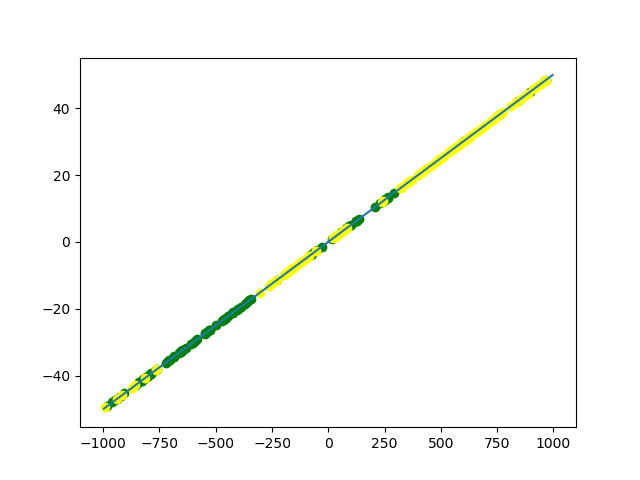

Above line: 539
At line: 0
Under line: 461


In [186]:
plotDivision(D_divided_2_np, 100, 1000)

#### Podział punktów na prostej $eps = 10^{-14}$

In [187]:
eps2 = np.float64(10**(-14))

In [188]:
division_eps2 = createDivision(D, a, b, eps2)

<IPython.core.display.Javascript object>


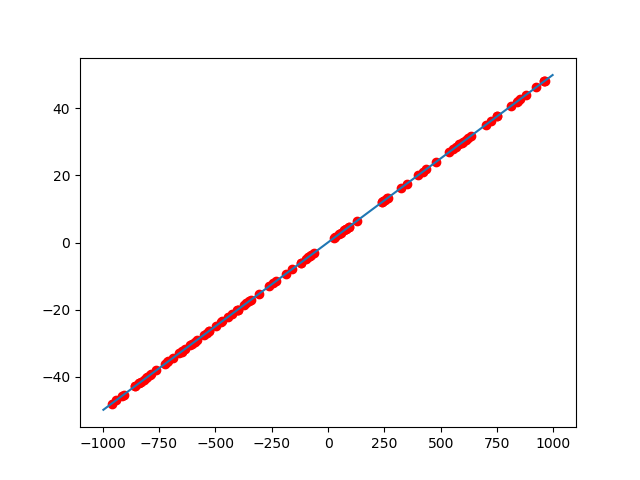

Above line: 0
At line: 1000
Under line: 0


In [189]:
plotDivision(division_eps2[0], 100, 1000)

<IPython.core.display.Javascript object>


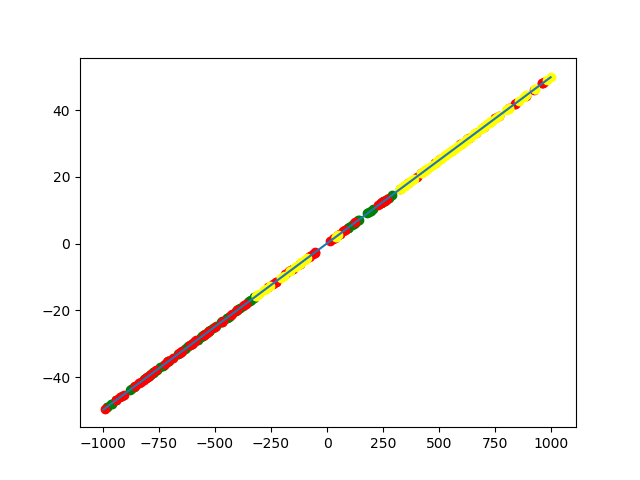

Above line: 157
At line: 719
Under line: 124


In [190]:
plotDivision(division_eps2[1], 100, 1000)

<IPython.core.display.Javascript object>


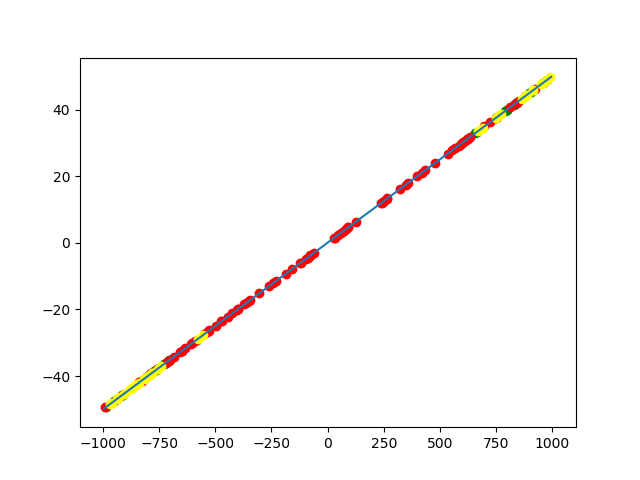

Above line: 27
At line: 931
Under line: 42


In [191]:
plotDivision(division_eps2[2], 100, 1000)

<IPython.core.display.Javascript object>


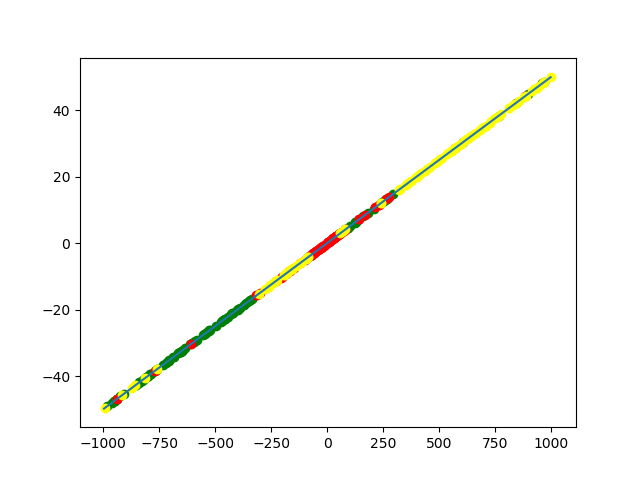

Above line: 490
At line: 98
Under line: 412


In [192]:
plotDivision(division_eps2[3], 100, 1000)

#### Podział punktów na prostej $eps = 10^{-6}$

In [193]:
eps3 = np.float64(10**(-6))

In [194]:
division_eps3 = createDivision(D, a, b, eps3)

<IPython.core.display.Javascript object>


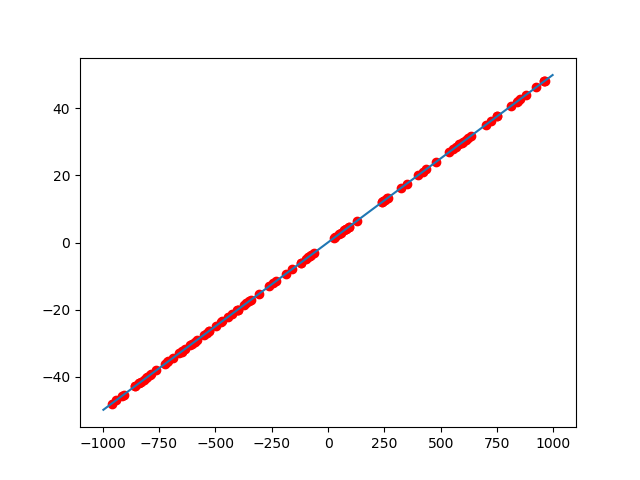

Above line: 0
At line: 1000
Under line: 0


In [195]:
plotDivision(division_eps3[0], 100, 1000)

<IPython.core.display.Javascript object>


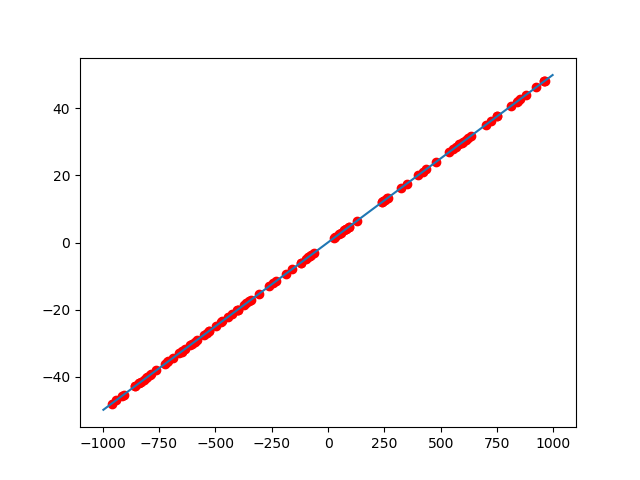

Above line: 0
At line: 1000
Under line: 0


In [196]:
plotDivision(division_eps3[1], 100, 1000)

<IPython.core.display.Javascript object>


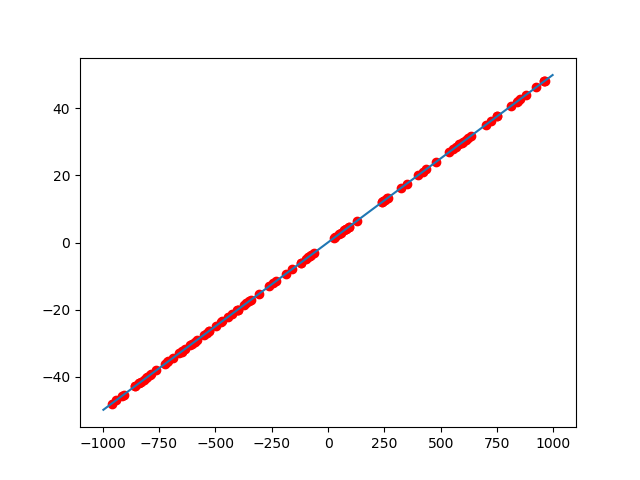

Above line: 0
At line: 1000
Under line: 0


In [197]:
plotDivision(division_eps3[2], 100, 1000)

<IPython.core.display.Javascript object>


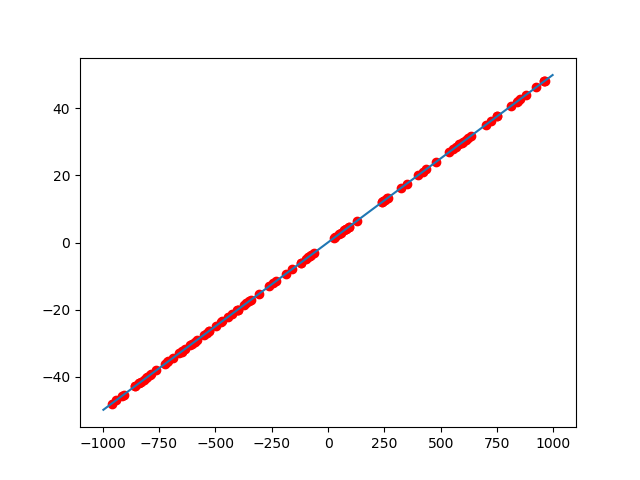

Above line: 0
At line: 1000
Under line: 0


In [198]:
plotDivision(division_eps3[3], 100, 1000)

#### Wizualizacja punktów różnie klasyfikowanych przez różne wyznaczniki $eps = 10^{-14}$

In [199]:
def compareDet(det1, det2, Z, a, b, eps):
    dif = []
    w = []
    for i in Z:
        w1 = det1(a, b, i)
        w2 = det2(a, b, i)
        
        if w1>eps:
            pw1 = 1;
        elif w1<-eps:
            pw1 = -1
        else:
            pw1 = 0
            
        if w2>eps:
            pw2 = 1;
        elif w2<-eps:
            pw2 = -1
        else:
            pw2 = 0
            
        if(pw1 != pw2):
            dif.append(i)
            w.append([pw1, pw2])
    return (w, dif)
        

In [200]:
def difference(det1, det2, Z, a, b, eps):
    w, dif = compareDet(det1, det2, Z, a, b, eps)
    allPoints = [[], [], [], [], [], []]
    for i in range(len(dif)):
        if w[i] == [0, 1]:
            allPoints[0].append(dif[i])
        elif w[i] == [1, 0]:
            allPoints[1].append(dif[i])
        elif w[i] == [0, -1]:
            allPoints[2].append(dif[i])
        elif w[i] == [-1, 0]:
            allPoints[3].append(dif[i])
        elif w[i] == [1, -1]:
            allPoints[4].append(dif[i])
        else:
            allPoints[5].append(dif[i])
    return allPoints

In [201]:
def showDifferences(det1, det2, Z, n, s, eps):
    allPoints = difference(det1, det2, Z, a, b, eps)
    %matplotlib notebook
    line = [(-s, 0.05*(-s)+0.05), (s, 0.05*s+0.05)]
    plot = Plot(points=[PointsCollection(allPoints[0][:n], color="green"), PointsCollection(allPoints[1][:n], color="red"), PointsCollection(allPoints[2][:n], color="yellow"), PointsCollection(allPoints[3][:n], color="cyan"), PointsCollection(allPoints[4][:n], color="pink"), PointsCollection(allPoints[5][:n], color="purple")],lines=[LinesCollection(lines=[line])])
    plot.draw()
    print("Green - {} at line, {} above line: {}".format(det1.__name__, det2.__name__, len(allPoints[0])))
    print("Red - {} above line, {} at line: {}".format(det1.__name__, det2.__name__, len(allPoints[1])))
    print("Yellow - {} at line, {} under line: {}".format(det1.__name__, det2.__name__, len(allPoints[2])))
    print("Cyan - {} under line, {} at line: {}".format(det1.__name__, det2.__name__, len(allPoints[3])))
    print("Pink - {} above line, {} under line: {}".format(det1.__name__, det2.__name__, len(allPoints[4])))
    print("Purple - {} under line, {} above line: {}".format(det1.__name__, det2.__name__, len(allPoints[5])))

In [202]:
def classifiedAs(w1, w2, compared):
    print("Classification by my det: {}".format(w1))
    print("Classification by numpy det: {}".format(w2))
    print("1 - above line, 0 - at line, -1 - under line")
    points = []
    W = compared[0]
    P = compared[1]
    for i in range(len(W)):
        if W[i][0]==w1 and W[i][1] == w2:
            points.append(P[i])
    return points

##### Mój wyznacznik 3x3 vs wyznacznik 3x3 z numpy

<IPython.core.display.Javascript object>


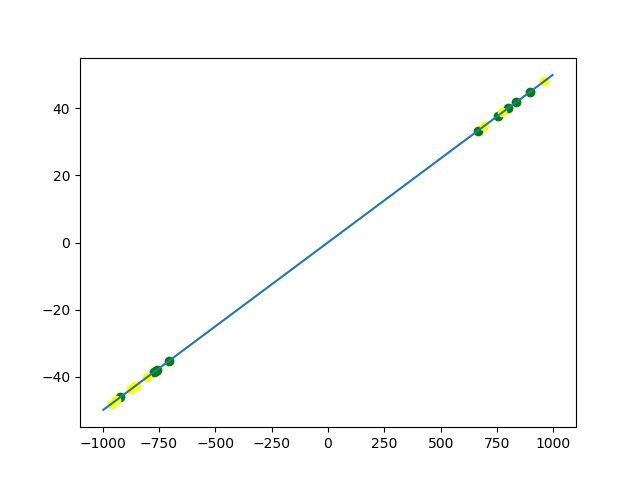

Green - det_1 at line, det_1_np above line: 27
Red - det_1 above line, det_1_np at line: 0
Yellow - det_1 at line, det_1_np under line: 42
Cyan - det_1 under line, det_1_np at line: 0
Pink - det_1 above line, det_1_np under line: 0
Purple - det_1 under line, det_1_np above line: 0


In [203]:
showDifferences(det_1, det_1_np, D, 10, 1000, eps2)

##### Mój wyznacznik 2x2 vs wyznacznik 2x2 z numpy

<IPython.core.display.Javascript object>


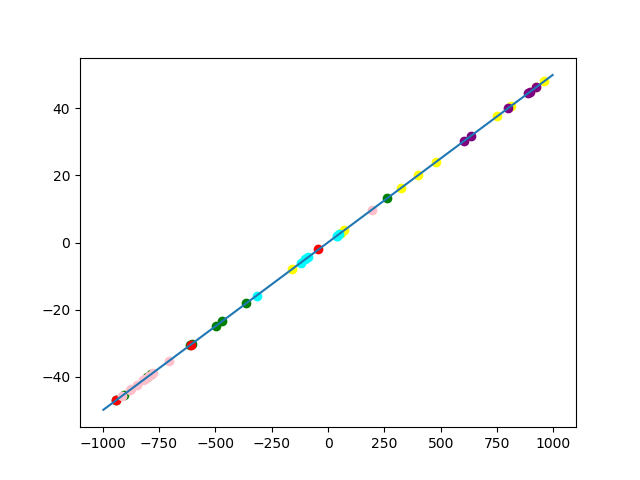

Green - det_2 at line, det_2_np above line: 341
Red - det_2 above line, det_2_np at line: 3
Yellow - det_2 at line, det_2_np under line: 290
Cyan - det_2 under line, det_2_np at line: 7
Pink - det_2 above line, det_2_np under line: 11
Purple - det_2 under line, det_2_np above line: 6


In [204]:
showDifferences(det_2, det_2_np, D, 10, 1000, eps2)

##### Mój wyznacznik 3x3 vs wyznacznik 2x2 z numpy

<IPython.core.display.Javascript object>


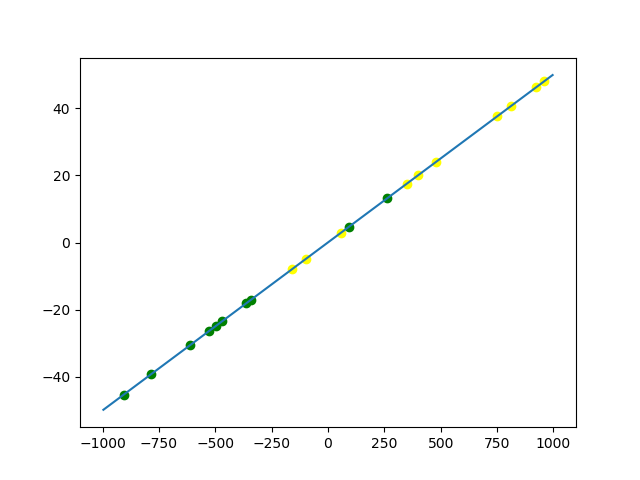

Green - det_1 at line, det_2_np above line: 490
Red - det_1 above line, det_2_np at line: 0
Yellow - det_1 at line, det_2_np under line: 412
Cyan - det_1 under line, det_2_np at line: 0
Pink - det_1 above line, det_2_np under line: 0
Purple - det_1 under line, det_2_np above line: 0


In [205]:
showDifferences(det_1, det_2_np, D, 10, 1000, eps2)

##### Mój wyznacznik 2x2 vs wyznacznik 3x3 z numpy

<IPython.core.display.Javascript object>


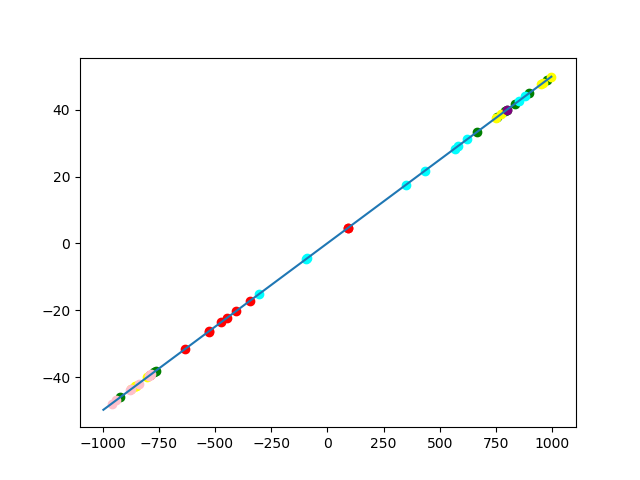

Green - det_2 at line, det_1_np above line: 22
Red - det_2 above line, det_1_np at line: 146
Yellow - det_2 at line, det_1_np under line: 31
Cyan - det_2 under line, det_1_np at line: 119
Pink - det_2 above line, det_1_np under line: 7
Purple - det_2 under line, det_1_np above line: 1


In [206]:
showDifferences(det_2, det_1_np, D, 10, 1000, eps2)

#### Wizualizacja punktów różnie klasyfikowanych przez różne wyznaczniki $eps = 10^{-6}$

##### Mój wyznacznik 3x3 vs wyznacznik 3x3 z numpy

<IPython.core.display.Javascript object>


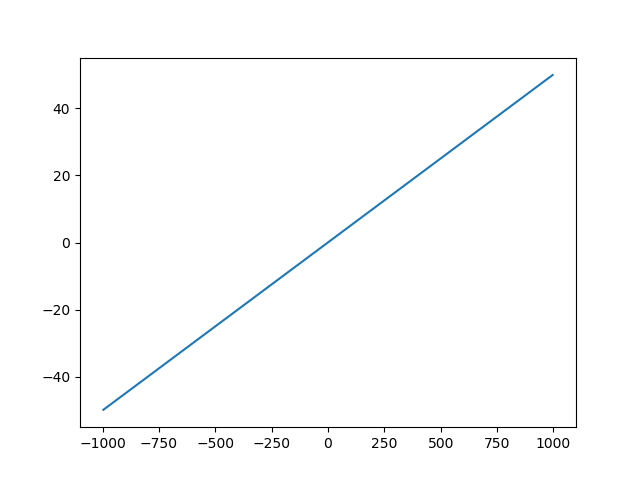

Green - det_1 at line, det_1_np above line: 0
Red - det_1 above line, det_1_np at line: 0
Yellow - det_1 at line, det_1_np under line: 0
Cyan - det_1 under line, det_1_np at line: 0
Pink - det_1 above line, det_1_np under line: 0
Purple - det_1 under line, det_1_np above line: 0


In [207]:
showDifferences(det_1, det_1_np, D, 10, 1000, eps3)

##### Mój wyznacznik 2x2 vs wyznacznik 2x2 z numpy

<IPython.core.display.Javascript object>


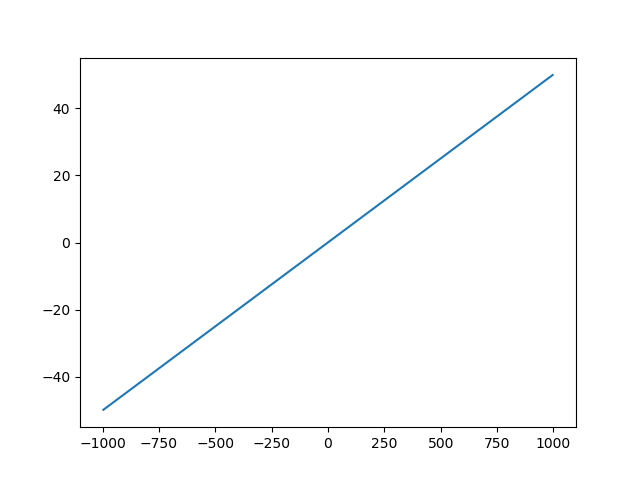

Green - det_2 at line, det_2_np above line: 0
Red - det_2 above line, det_2_np at line: 0
Yellow - det_2 at line, det_2_np under line: 0
Cyan - det_2 under line, det_2_np at line: 0
Pink - det_2 above line, det_2_np under line: 0
Purple - det_2 under line, det_2_np above line: 0


In [208]:
showDifferences(det_2, det_2_np, D, 10, 1000, eps3)

##### Mój wyznacznik 3x3 vs wyznacznik 2x2 z numpy

<IPython.core.display.Javascript object>


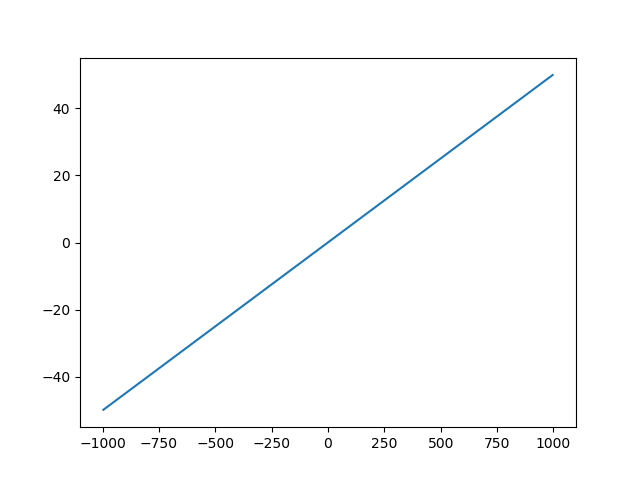

Green - det_1 at line, det_2_np above line: 0
Red - det_1 above line, det_2_np at line: 0
Yellow - det_1 at line, det_2_np under line: 0
Cyan - det_1 under line, det_2_np at line: 0
Pink - det_1 above line, det_2_np under line: 0
Purple - det_1 under line, det_2_np above line: 0


In [209]:
showDifferences(det_1, det_2_np, D, 10, 1000, eps3)

##### Mój wyznacznik 2x2 vs wyznacznik 3x3 z numpy

<IPython.core.display.Javascript object>


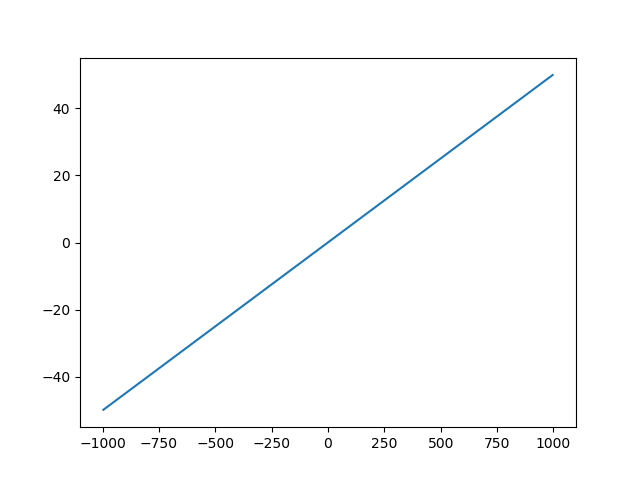

Green - det_2 at line, det_1_np above line: 0
Red - det_2 above line, det_1_np at line: 0
Yellow - det_2 at line, det_1_np under line: 0
Cyan - det_2 under line, det_1_np at line: 0
Pink - det_2 above line, det_1_np under line: 0
Purple - det_2 under line, det_1_np above line: 0


In [210]:
showDifferences(det_2, det_1_np, D, 10, 1000, eps3)